In [94]:
# Realizar un análisis exploratorio, mostrando el tamaño del dataset, 
# los nombres de las columnas, los tipos de datos y las mediadas de resumen.
# ¿Hay valores faltantes?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dolar = pd.read_csv('./dolar_oficial_ambito.csv')
dolar

,fecha,compra,venta
0,05-08-2020,71.89,76.89
1,04-08-2020,71.69,76.69
2,03-08-2020,71.64,76.64
3,31-07-2020,71.39,76.39
4,30-07-2020,71.27,76.27
...,...,...,...
1263,05-06-2015,8.98,9.03
1264,04-06-2015,8.97,9.02
1265,03-06-2015,8.97,9.02
1266,02-06-2015,8.97,9.02


In [95]:
dolar.shape

(1268, 3)

In [96]:
dolar.size

3804

In [97]:
dolar.describe()

,compra,venta
count,1268.000000,1268.00000
mean,28.633730,30.16709
std,18.330937,20.02763
min,8.960000,9.01000
25%,14.987500,15.37750
50%,17.885000,18.28500
75%,41.387500,43.48500
max,71.890000,76.89000


In [98]:
dolar.dtypes

fecha      object
compra    float64
venta     float64
dtype: object

In [99]:
dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   1268 non-null   object 
 1   compra  1268 non-null   float64
 2   venta   1268 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.8+ KB


In [100]:
dolar.head(5)

,fecha,compra,venta
0,05-08-2020,71.89,76.89
1,04-08-2020,71.69,76.69
2,03-08-2020,71.64,76.64
3,31-07-2020,71.39,76.39
4,30-07-2020,71.27,76.27


In [101]:
dolar.tail(5)

,fecha,compra,venta
1263,05-06-2015,8.98,9.03
1264,04-06-2015,8.97,9.02
1265,03-06-2015,8.97,9.02
1266,02-06-2015,8.97,9.02
1267,01-06-2015,8.96,9.01


In [102]:
dolar['compra'].value_counts(sort=True)

57.97    8
57.98    8
57.99    7
15.75    7
20.11    6
        ..
36.51    1
36.77    1
36.83    1
37.41    1
8.96     1
Name: compra, Length: 847, dtype: int64

In [103]:
dolar['venta'].value_counts(sort=True)

62.99    8
62.97    8
62.98    8
16.15    7
17.67    6
        ..
38.42    1
38.51    1
38.77    1
38.83    1
9.01     1
Name: venta, Length: 853, dtype: int64

In [17]:
dolar.isna() #Indica valores booleanos (True o False) por cada elemento
dolar.isna().any() #Indica valores booleanos por cada columna
dolar.isna().sum() #Indica valores numéricos por cada columna

fecha     0
compra    0
venta     0
dtype: int64

In [105]:
# Convertir el atributo fecha en tipo de dato date. Hint : pandas.to_datetime(...)

dolar.fecha = pd.to_datetime(dolar.fecha, infer_datetime_format=True)
dolar.fecha

0      2020-05-08
1      2020-04-08
2      2020-03-08
3      2020-07-31
4      2020-07-30
          ...    
1263   2015-05-06
1264   2015-04-06
1265   2015-03-06
1266   2015-02-06
1267   2015-01-06
Name: fecha, Length: 1268, dtype: datetime64[ns]

In [107]:
# A partir del atributo fecha generar tres nuevas columnas : dia, mes, año.


dia = pd.to_datetime(dolar['fecha']).dt.day
mes = pd.to_datetime(dolar['fecha']).dt.month
año = pd.to_datetime(dolar['fecha']).dt.year

dolar['dia'] = dia
dolar['mes'] = mes
dolar['año'] = año

dolar[:10]


,fecha,compra,venta,dia,mes,año
0,2020-05-08,71.89,76.89,8,5,2020
1,2020-04-08,71.69,76.69,8,4,2020
2,2020-03-08,71.64,76.64,8,3,2020
3,2020-07-31,71.39,76.39,31,7,2020
4,2020-07-30,71.27,76.27,30,7,2020
5,2020-07-29,71.08,76.08,29,7,2020
6,2020-07-28,71.10,76.10,28,7,2020
7,2020-07-27,71.00,76.00,27,7,2020
8,2020-07-24,70.92,75.92,24,7,2020
9,2020-07-24,70.86,75.86,24,7,2020


In [108]:
# Generar un nuevo DataFrame dolar_prom_mes que contenga la cotización promedio mensual (para la compra y para la venta) de cada mes.
# El DF debe tener las siguientes columnas: año,mes,venta_prom_mes,compra_prom_mes

venta_prom_mes = dolar.groupby(['mes'])['compra'].mean()
compra_prom_mes = dolar.groupby(['mes'])['venta'].mean()

data = {'año': dolar['año'], 'mes': dolar['mes'], 'venta_prom_mes': venta_prom_mes, 'compra_prom_mes': compra_prom_mes}

dolar_prom_mes = pd.DataFrame(data)

dolar_prom_mes[:10]

,año,mes,venta_prom_mes,compra_prom_mes
0,2020,5,NaN,NaN
1,2020,4,28.418667,30.001048
2,2020,3,28.522188,30.082604
3,2020,7,29.392264,30.964906
4,2020,7,30.877647,32.585000
5,2020,7,31.385000,33.078981
6,2020,7,28.649009,30.136847
7,2020,7,30.104603,31.666905
8,2020,7,27.078544,28.522718
9,2020,7,26.346337,27.622772


In [109]:
# Generar un nuevo DataFrame dolar_maxmin_mes que contenga la cotización más alta y la mas baja de cada mes.
# El DF debe tener las siguientes columnas: año,mes,venta_max_mes,venta_min_mes,compra_max_mes, compra_min_mes

venta_max_mes = dolar.groupby(['mes'])['venta'].max()
venta_min_mes = dolar.groupby(['mes'])['venta'].min()

compra_max_mes = dolar.groupby(['mes'])['compra'].max()
compra_min_mes = dolar.groupby(['mes'])['compra'].min()


data = {'año': dolar['año'], 'mes': dolar['mes'], 'venta_max_mes': venta_max_mes, 'venta_min_mes': venta_min_mes, 'compra_max_mes': compra_max_mes, 'compra_min_mes': compra_min_mes}

dolar_maxmin_mes = pd.DataFrame(data)

dolar_maxmin_mes[:10]

,año,mes,venta_max_mes,venta_min_mes,compra_max_mes,compra_min_mes
0,2020,5,NaN,NaN,NaN,NaN
1,2020,4,74.13,9.01,69.13,8.96
2,2020,3,74.18,9.02,69.18,8.97
3,2020,7,76.64,9.02,71.64,8.97
4,2020,7,76.69,9.02,71.69,8.97
5,2020,7,76.89,9.03,71.89,8.98
6,2020,7,74.61,9.06,69.61,9.01
7,2020,7,76.39,9.13,71.39,9.08
8,2020,7,74.71,9.03,69.71,8.98
9,2020,7,72.04,9.04,67.04,8.99


In [110]:
# Generar un nuevo DataFrame dolar_hist que contenga las cotizaciones diarias junto con la máxima, la mínima y la promedio del mes.
# El DF debe tener las siguientes columas: 
# año, mes, dia, compra, compra_prom, compra_max_mes, compra_min_mes, venta, venta_prom_mes, venta_max_mes, venta_min_mes

venta_prom_mes = dolar.groupby(['mes'])['compra'].mean()
compra_prom_mes = dolar.groupby(['mes'])['venta'].mean()
venta_max_mes = dolar.groupby(['mes'])['venta'].max()
venta_min_mes = dolar.groupby(['mes'])['venta'].min()
compra_max_mes = dolar.groupby(['mes'])['compra'].max()
compra_min_mes = dolar.groupby(['mes'])['compra'].min()

data = {'año': dolar['año'], 'mes': dolar['mes'], 'venta_prom_mes': venta_prom_mes, 'compra_prom_mes': compra_prom_mes}

dolar_prom_mes = pd.DataFrame(data)


data = {'año': dolar['año'], 'mes': dolar['mes'], 'venta_max_mes': venta_max_mes, 'venta_min_mes': venta_min_mes, 'compra_max_mes': compra_max_mes, 'compra_min_mes': compra_min_mes, 'venta_prom_mes': venta_prom_mes, 'compra_prom_mes': compra_prom_mes, 'venta': dolar['venta'], 'compra': dolar['compra']}

dolar_hist = pd.DataFrame(data)

dolar_hist[:10]

,año,mes,venta_max_mes,venta_min_mes,compra_max_mes,compra_min_mes,venta_prom_mes,compra_prom_mes,venta,compra
0,2020,5,NaN,NaN,NaN,NaN,NaN,NaN,76.89,71.89
1,2020,4,74.13,9.01,69.13,8.96,28.418667,30.001048,76.69,71.69
2,2020,3,74.18,9.02,69.18,8.97,28.522188,30.082604,76.64,71.64
3,2020,7,76.64,9.02,71.64,8.97,29.392264,30.964906,76.39,71.39
4,2020,7,76.69,9.02,71.69,8.97,30.877647,32.585000,76.27,71.27
5,2020,7,76.89,9.03,71.89,8.98,31.385000,33.078981,76.08,71.08
6,2020,7,74.61,9.06,69.61,9.01,28.649009,30.136847,76.10,71.10
7,2020,7,76.39,9.13,71.39,9.08,30.104603,31.666905,76.00,71.00
8,2020,7,74.71,9.03,69.71,8.98,27.078544,28.522718,75.92,70.92
9,2020,7,72.04,9.04,67.04,8.99,26.346337,27.622772,75.86,70.86


In [111]:
# Generar un nuevo DataFrame dolar_long con las siguientes columnas: año, mes, tipo_cot, cot donde la variable tipo_cot 
# tome los valores literales 'compra' o 'venta' y la varibale cot la cotización correspondiente. Hint: pandas.melt(....)

df_melted = pd.melt(dolar, id_vars=["mes", "año"], value_vars=["compra", "venta"], var_name="tipo_cot", value_name="cot")
df_melted

,mes,año,tipo_cot,cot
0,5,2020,compra,71.89
1,4,2020,compra,71.69
2,3,2020,compra,71.64
3,7,2020,compra,71.39
4,7,2020,compra,71.27
...,...,...,...,...
2531,5,2015,venta,9.03
2532,4,2015,venta,9.02
2533,3,2015,venta,9.02
2534,2,2015,venta,9.02


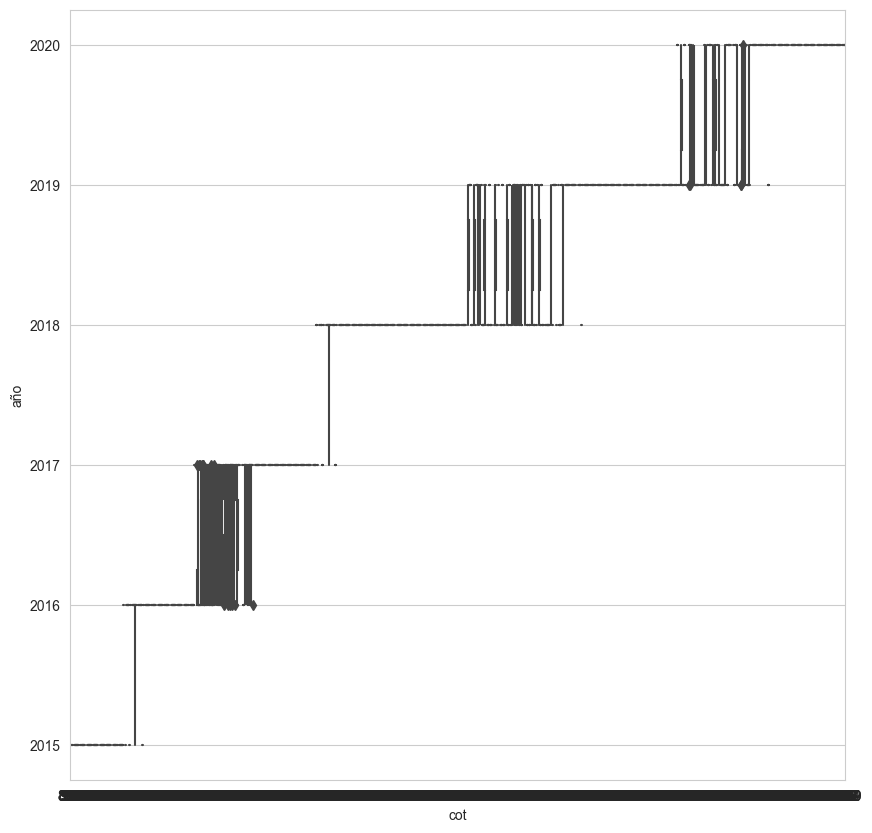

In [113]:
# Boxplots comparativos de la cotización de venta por año.

df_melted = pd.melt(dolar, id_vars=["mes", "año"], value_vars=["compra", "venta"], var_name="tipo_cot", value_name="cot")
df_melted

plt.figure(figsize=(10,10))

sns.boxplot(x="cot", y='año', data=df_melted)
  
plt.show()

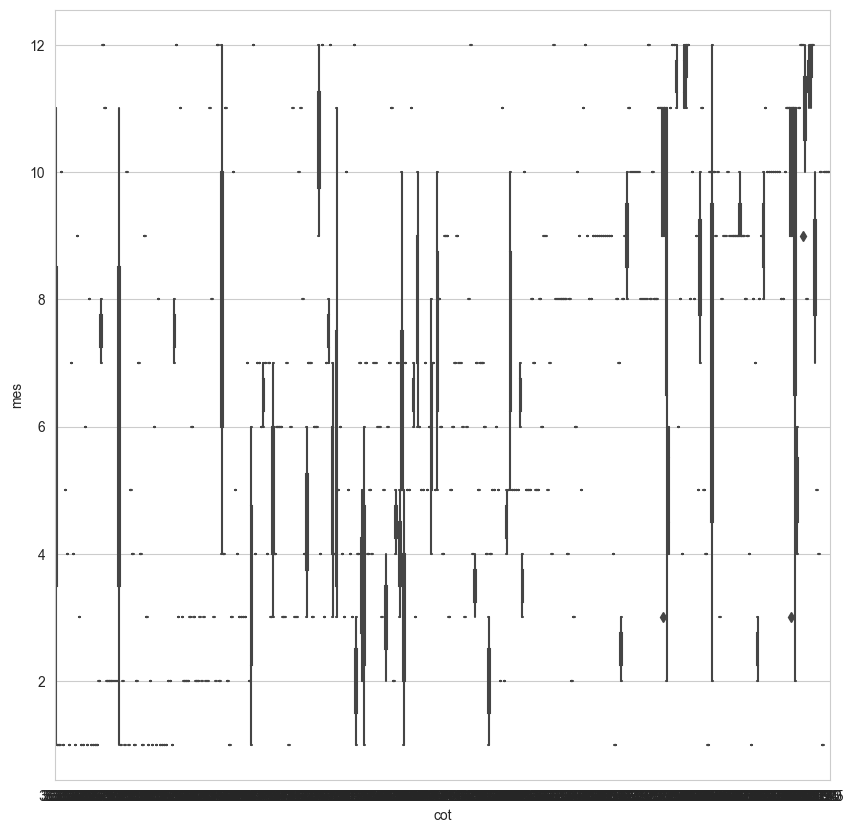

In [114]:
# Boxplots comparativos de la cotización de venta por mes para el año 2019.

df_melted = pd.melt(dolar, id_vars=['mes', 'año'], value_vars=['compra', 'venta'], var_name='tipo_cot', value_name='cot')
df_filtrado = df_melted[df_melted['año'] == 2019]

plt.figure(figsize=(10,10))
sns.boxplot(x='cot', y='mes', data=df_filtrado)
plt.show()

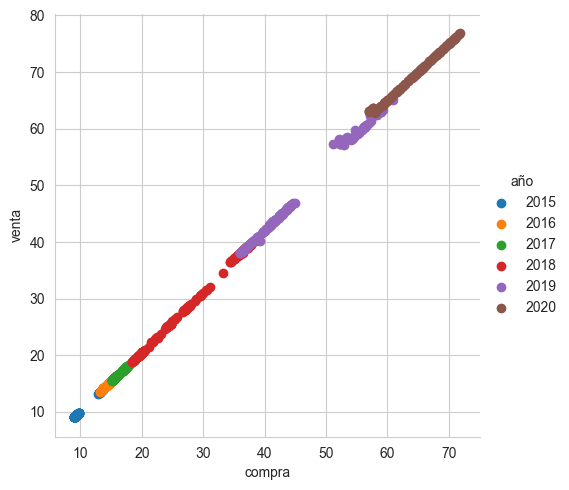

In [115]:
# Gráfico de la serie de tiempo de la cotización de compra y de venta diaria.
# Plus: Incluir en el gráfico la tendencia promedio mensual.

# scatter plot de la compra y venta de dolares, coloreando las observaciones por año.

sns.set_style('whitegrid')
sns.FacetGrid(dolar, hue ='año', height = 5).map(plt.scatter,'compra', 'venta').add_legend()

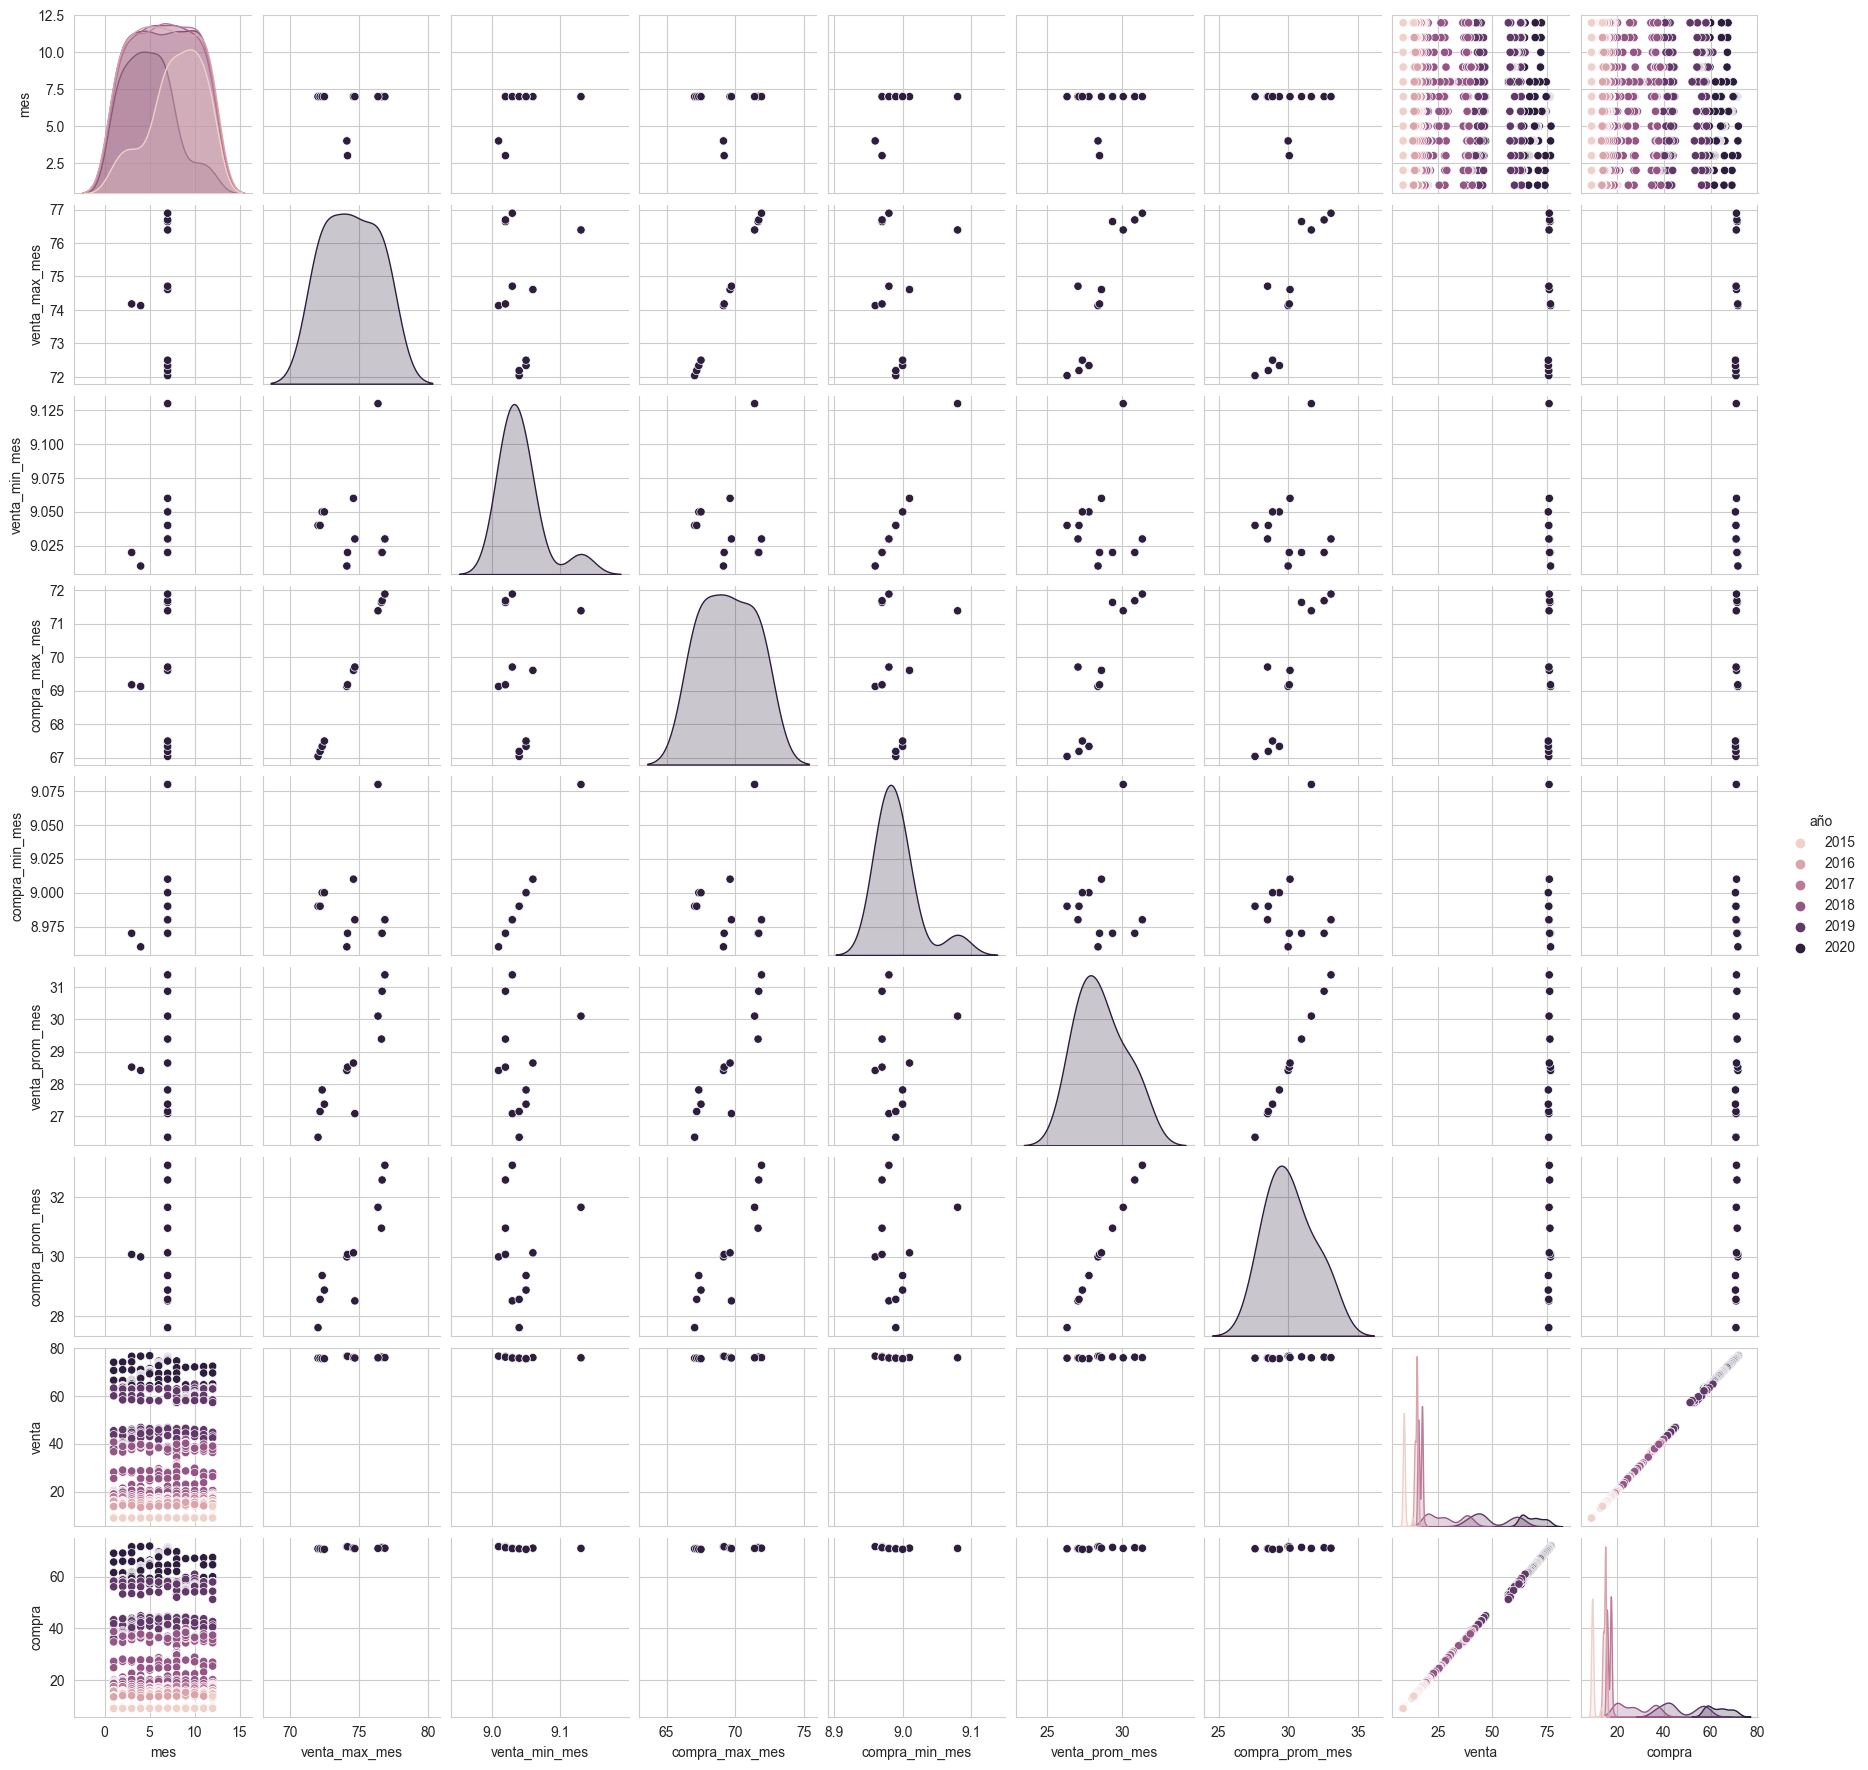

In [116]:
# Gráfico a elección con el dataset dolar_long que permita obtener información diferente a la obtenida a partir 
# de los gráficos anteriores.

venta_prom_mes = dolar.groupby(['mes'])['compra'].mean()
compra_prom_mes = dolar.groupby(['mes'])['venta'].mean()
venta_max_mes = dolar.groupby(['mes'])['venta'].max()
venta_min_mes = dolar.groupby(['mes'])['venta'].min()
compra_max_mes = dolar.groupby(['mes'])['compra'].max()
compra_min_mes = dolar.groupby(['mes'])['compra'].min()

data = {'año': dolar['año'], 'mes': dolar['mes'], 'venta_prom_mes': venta_prom_mes, 'compra_prom_mes': compra_prom_mes}

dolar_prom_mes = pd.DataFrame(data)


data = {'año': dolar['año'], 'mes': dolar['mes'], 'venta_max_mes': venta_max_mes, 'venta_min_mes': venta_min_mes, 'compra_max_mes': compra_max_mes, 'compra_min_mes': compra_min_mes, 'venta_prom_mes': venta_prom_mes, 'compra_prom_mes': compra_prom_mes, 'venta': dolar['venta'], 'compra': dolar['compra']}

dolar_hist = pd.DataFrame(data)

dolar_hist[:10]

sns.pairplot(dolar_hist, hue='año', height=2)